In [1]:
# Importing Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.stats import chi2_contingency


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Setting Working Directory

os.chdir("D:\Data Science\edWisor\Project 2\data")

In [3]:
# Loading Data

data = pd.read_csv('day.csv')

# Exploratory data Analysis

In [4]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
features = pd.DataFrame(data.columns)
#features.to_csv('features.csv')

In [6]:
# Continous variables

cnames = ['temp','atemp','hum','windspeed']
cat_names = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [7]:
# Corelation between continous variables

corr = data[cnames].corr()
corr
#corr.to_csv('Correlations.csv')

,temp,atemp,hum,windspeed
temp,1.000000,0.991702,0.126963,-0.157944
atemp,0.991702,1.000000,0.139988,-0.183643
hum,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.157944,-0.183643,-0.248489,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


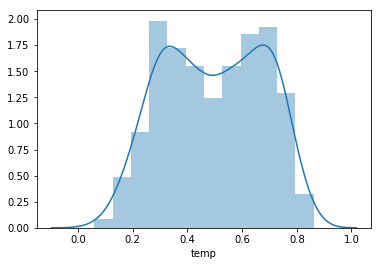

In [8]:
sns.distplot(data['temp'])
#plt.savefig('temp.png')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


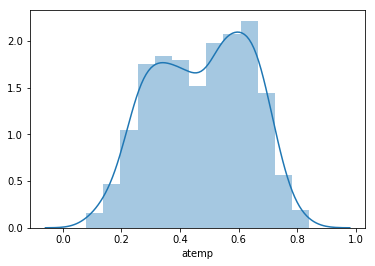

In [9]:
sns.distplot(data['atemp'])
#plt.savefig('atemp.png')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


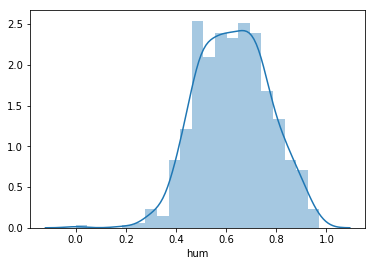

In [10]:
sns.distplot(data['hum'])
#plt.savefig('hum.png')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


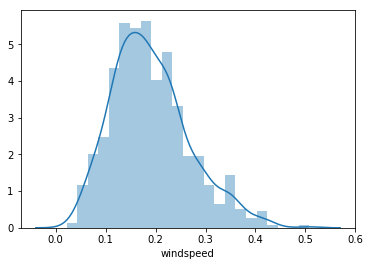

In [11]:
sns.distplot(data['windspeed'])
#plt.savefig('windspeed.png')

Text(0,0.5,'Count')

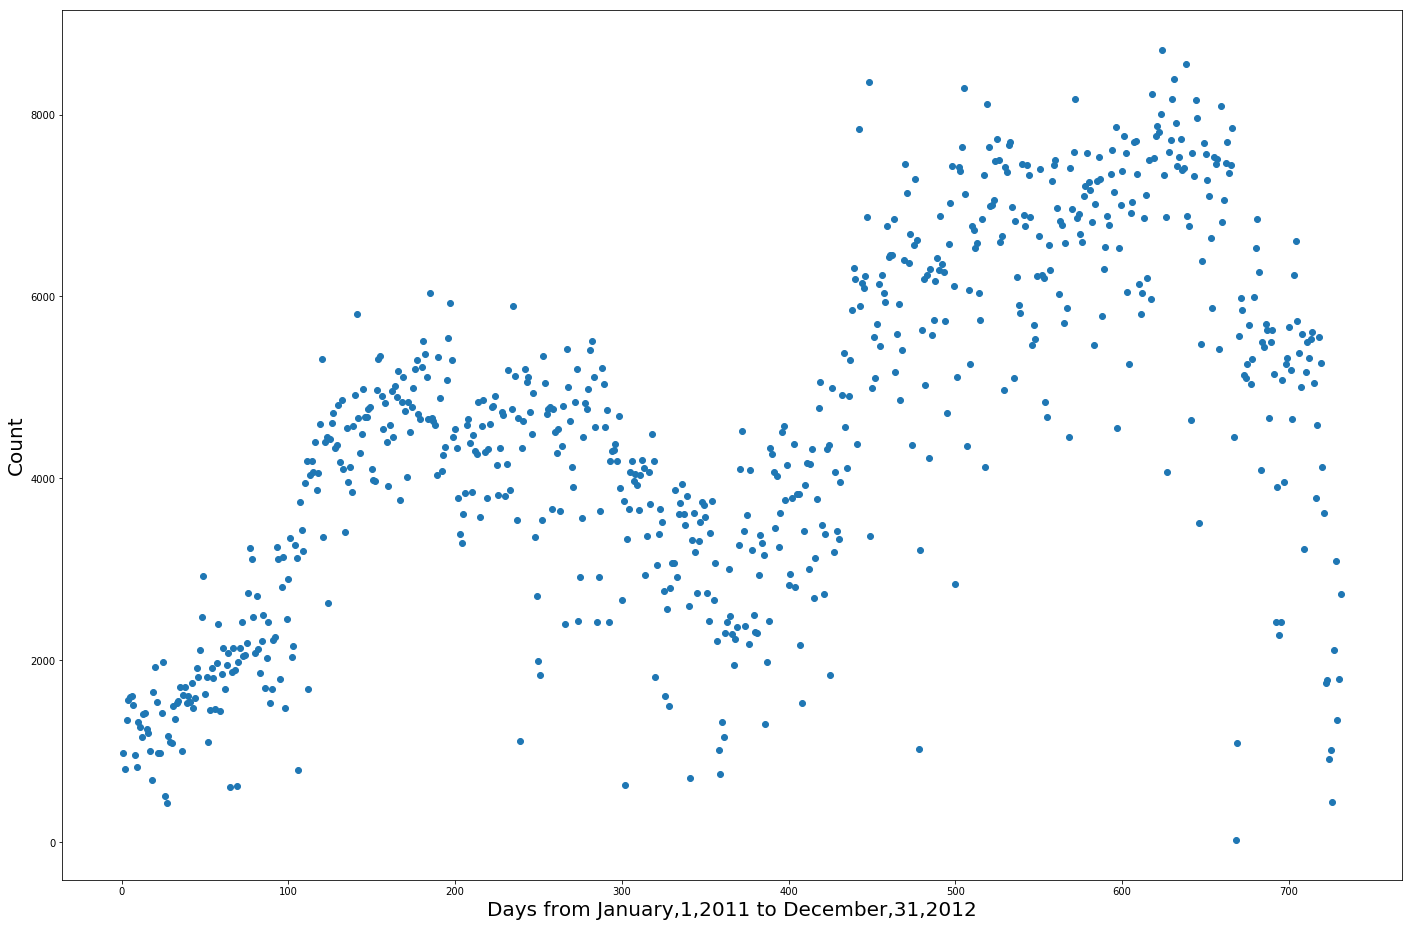

In [12]:
plt.figure(figsize=(24,16))
plt.scatter(data['instant'], data['cnt'])
plt.xlabel('Days from January,1,2011 to December,31,2012', fontsize = 20)
plt.ylabel('Count', fontsize =20)
#plt.savefig('RentCount.png')

In [5]:
# Creating Dummy Variables for non-binary categorical variables

for i in ['season','mnth','weekday','weathersit']:
    temp = pd.get_dummies(data[i], prefix = i)
    data = data.join(temp)
    data.drop(i, axis =1,inplace = True)

In [6]:
data.drop(['instant','dteday','season_1','mnth_1','weekday_0','weathersit_1'],axis=1,inplace = True)

In [20]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,331,654,985,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,...,0,0,0,0,1,0,0,0,0,0


In [7]:
# Splitting the data into train and test sets

train,test = train_test_split(data,test_size =0.2, random_state =0)

In [8]:
# Preparing Data for modelling

X_train = train.drop(['casual','registered','cnt','temp'],axis=1)
X_test = test.drop(['casual','registered','cnt','temp'],axis=1)
y_casual = train['casual']
y_registered = train['registered']
y_cnt = train['cnt']

In [9]:
# Evaluation Functions

def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE

def RMSE(y_true, y_pred):
    rms = sqrt(mean_squared_error(y_true, y_pred))
    return rms
#Calculate RMSE

# Regression Models

# Multiple linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# Grid Search for best Parameters

reg_lm = LinearRegression()
params_lm = [{'copy_X':[True, False],
              'fit_intercept':[True,False],
              'normalize':[True, False]}]
grid_search_lm = GridSearchCV(reg_lm, param_grid = params_lm, cv =10, n_jobs =-1)
grid_search_lm = grid_search_lm.fit(X_train,y_cnt)

In [26]:
grid_search_lm.best_score_

0.8176309034613622

In [27]:
grid_search_lm.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [28]:
# Training with best paramaeters

reg_lm_best = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)
reg_lm_best.fit(X_train,y_cnt)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [29]:
# Evaluating on training set

y_pred_lm = reg_lm_best.predict(X_train)
mape1_lm = MAPE(y_cnt, y_pred_lm)
rmse1_lm = RMSE(y_cnt, y_pred_lm)
print('MAPE : {:.2f}'.format(mape1_lm))
print('RMSE : {:.2f}'.format(rmse1_lm))

MAPE : 44.11
RMSE : 756.08


In [30]:
# Evaluating on Test Set

y_pred_lm = reg_lm_best.predict(X_test)
mape2_lm = MAPE(test['cnt'], y_pred_lm)
rmse2_lm = RMSE(test['cnt'], y_pred_lm)
print('MAPE : {:.2f}'.format(mape2_lm))
print('RMSE : {:.2f}'.format(rmse2_lm))

MAPE : 18.26
RMSE : 780.30


# Supoort Vector Regressor

In [31]:
from sklearn.svm import SVR

In [32]:
# Grid Search for best Parameters

reg_svr = SVR()
param= [{'C':[1,10,100,1000],
         'kernel': ['rbf','linear'],
         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]
grid_search_svr = GridSearchCV(reg_svr, param_grid = param, cv =10, n_jobs =-1)
grid_search_svr = grid_search_svr.fit(X_train,y_cnt)

In [33]:
grid_search_svr.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'linear'}

In [34]:
grid_search_svr.best_score_

0.8161448750421367

In [35]:
# Training with best paramaeters

reg_svr_best = SVR(C = 1000, kernel = 'linear', gamma = 0.0001)
reg_svr_best.fit(X_train,y_cnt)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
# Evaluating on training set

a = reg_svr_best.predict(X_train)
mape1_svr = MAPE(y_cnt,a)
rmse1_svr = RMSE(y_cnt,a)
print('MAPE : {:.2f}'.format(mape1_svr))
print('RMSE : {:.2f}'.format(rmse1_svr))

MAPE : 45.85
RMSE : 772.38


In [37]:
# Evaluating on Test Set

y_pred = reg_svr_best.predict(X_test)
mape2_svr = MAPE(test['cnt'],y_pred)
rmse2_svr = RMSE(test['cnt'],y_pred)
print('MAPE : {:.2f}'.format(mape2_svr))
print('RMSE : {:.2f}'.format(rmse2_svr))

MAPE : 18.01
RMSE : 765.09


# Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
# Grid Search for best Parameters

reg_dt = DecisionTreeRegressor(random_state = 0)
params = [{'max_depth':[2,4,6,8,10,12,15],
           'max_features':['auto','sqrt'],
           'min_samples_leaf':[2,4,6,8,10]}]
grid_search_dt = GridSearchCV(reg_dt, param_grid = params, cv =10, n_jobs =-1)
grid_search_dt = grid_search_dt.fit(X_train,y_cnt)

In [40]:
grid_search_dt.best_score_

0.7923245462173745

In [41]:
grid_search_dt.best_params_

{'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 10}

In [42]:
# Training with best parameters

reg_dt_best = DecisionTreeRegressor(random_state = 0, max_depth = 12,
                                    min_samples_leaf = 10, max_features = 'auto')
reg_dt_best.fit(X_train,y_cnt)

DecisionTreeRegressor(criterion='mse', max_depth=12, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [43]:
# Evaluating on training set

b = reg_dt_best.predict(X_train)
mape1_dt = MAPE(y_cnt,b)
rmse1_dt = RMSE(y_cnt,b)
print('MAPE : {:.2f}'.format(mape1_dt))
print('RMSE : {:.2f}'.format(rmse1_dt))

MAPE : 51.81
RMSE : 706.58


In [44]:
# Evaluating on test set

y_pred_dt = reg_dt_best.predict(X_test)
mape2_dt = MAPE(test['cnt'],y_pred_dt)
rmse2_dt = RMSE(test['cnt'],y_pred_dt)
print('MAPE : {:.2f}'.format(mape2_dt))
print('RMSE : {:.2f}'.format(rmse2_dt))

MAPE : 25.13
RMSE : 892.36


# Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
# Grid Search for best Parameters

reg_rf = RandomForestRegressor(random_state = 0)
params_rf = [{'max_depth':[8,10,12,15],
              'max_features':['auto','sqrt'],
              'min_samples_leaf':[2,4,6,8,10],
              'n_estimators': [200, 500, 600],
              'oob_score':[True, False]}]
grid_search_rf = GridSearchCV(reg_rf, param_grid = params_rf, cv =10, n_jobs =-1)
grid_search_rf = grid_search_rf.fit(X_train,y_cnt)

In [48]:
grid_search_rf.best_score_

0.8467041706322699

In [49]:
grid_search_rf.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 500,
 'oob_score': True}

In [53]:
reg_rf_best = RandomForestRegressor(random_state = 0, max_depth = 15,
                                    max_features = 'auto', min_samples_leaf = 2,
                                    n_estimators = 600, oob_score = True)
reg_rf_best.fit(X_train,y_cnt)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
           oob_score=True, random_state=0, verbose=0, warm_start=False)

In [54]:
# Evaluating on training set

c = reg_rf_best.predict(X_train)
mape1_rf = MAPE(y_cnt,c)
rmse1_rf = RMSE(y_cnt,c)
print('MAPE : {:.2f}'.format(mape1_rf))
print('RMSE : {:.2f}'.format(rmse1_rf))

MAPE : 27.10
RMSE : 368.15


In [55]:
# Evaluating on test set

y_pred_rf = reg_rf_best.predict(X_test)
mape2_rf = MAPE(test['cnt'],y_pred_rf)
rmse2_rf = RMSE(test['cnt'],y_pred_rf)
print('MAPE : {:.2f}'.format(mape2_rf))
print('RMSE : {:.2f}'.format(rmse2_rf))

MAPE : 20.02
RMSE : 708.95


# Result

In [56]:
result = pd.DataFrame()
result['Model'] = ['Multiple Linear Regressor','Support Vector Regressor',
                   'Decision Tree Regressor', 'Random Forest Regressor']
result['Training MAPE'] = [mape1_lm, mape1_svr, mape1_dt, mape1_rf]
result['Training RMSE'] = [rmse1_lm, rmse1_svr, rmse1_dt, rmse1_rf]
result['Test MAPE'] = [mape2_lm, mape2_svr, mape2_dt, mape2_rf]
result['Test RMSE'] = [rmse2_lm, rmse2_svr, rmse2_dt, rmse2_rf]
#result.to_csv('result.csv')

In [57]:
result

,Model,Training MAPE,Training RMSE,Test MAPE,Test RMSE
0,Multiple Linear Regressor,44.109374,756.080580,18.262967,780.303878
1,Support Vector Regressor,45.852352,772.379972,18.008466,765.085027
2,Decision Tree Regressor,51.809725,706.577452,25.133274,892.361957
3,Random Forest Regressor,27.097224,368.149119,20.023176,708.951493


# Output using Selected Model i.e. Random Forest Regressor

In [54]:
#pd.DataFrame(y_pred_rf).to_csv('Output.csv')

# Backward elimination

In [11]:
import statsmodels.formula.api as sm

In [56]:
train.shape

(584, 32)

In [57]:
test.shape

(147, 32)

In [13]:
X = np.append(arr = np.ones((584,1)).astype(int), values = X_train, axis =1 )

In [58]:
test_x = np.append(arr = np.ones((147,1)).astype(int), values = X_test, axis =1 )

In [59]:
test_X = test_x[:,[0,1,3,4,5,6,7,8,9,11,12,13,14,16,17,26,27,28]]

In [17]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,0.0,1.0,0.324479,0.836250,0.226992,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,1.0,0.0,1.0,0.551121,0.523333,0.136817,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.607975,0.722917,0.117546,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.585238,0.576250,0.225117,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.356063,0.703333,0.106350,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
X_opt = X[:,[0,1,3,4,5,6,7,8,9,11,12,13,14,16,17,26,27,28]]

In [51]:
reg_ols = sm.OLS(endog = y_cnt, exog = X_opt).fit()

In [52]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     168.4
Date:                Tue, 18 Sep 2018   Prob (F-statistic):          2.07e-208
Time:                        22:24:58   Log-Likelihood:                -4712.5
No. Observations:                 584   AIC:                             9461.
Df Residuals:                     566   BIC:                             9540.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1565.8752    265.079      5.907      0.000    1045.216    2086.535
x1          1946.0675     66.857     29.108      0.000    1814.750    2077.385
x2           313.6950     89.484      3.506      0.000     137.933     489.457
x3          5452.0022    388.505     14.033      0.000    4688.914    6215.090
x4         -1990.2682    349.208     -5.699      0.000   -2676.171   -1304.365
x5         -2831.2811    472.692     -5.990      0.000   -3759.727   -1902.836
x6           761.7093    183.692      4.147      0.000     400.907    1122.511
x7           708.1407    183.724      3.854      0.000     347.276    1069.005
x8          1569.2317    110.462     14.206      0.000    1352.266    1786.198
x9           516.4714    140.905      3.665      0.000     239.710     793.233
x10          324.4711    210.025      1.545      0.123     -88.053     736.996
x11          747.8865    210.216      3.558      0.000     334.989    1160.784
x12          370.7568    177.701      2.086      0.037      21.723     719.790
x13          489.4901    153.517      3.189      0.002     187.957     791.023
x14         1031.3101    152.417      6.766      0.000     731.938    1330.682
x15          410.9653    118.431      3.470      0.001     178.348     643.583
x16         -328.0905     88.944     -3.689      0.000    -502.791    -153.390
x17        -1728.0584    245.333     -7.044      0.000   -2209.933   -1246.183
==============================================================================
Omnibus:                       78.072   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.029
Skew:                          -0.681   Prob(JB):                     4.96e-45
Kurtosis:                       5.556   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
pred = reg_ols.predict(test_x)

ValueError: shapes (147,29) and (18,) not aligned: 29 (dim 1) != 18 (dim 0)